### Phase 1 - Problem Definition  
#### 1.1 Broad Goals  

The purpose of this study is to identify fraudulent transactions in an extremely unbalanced dataset.  

#### 1.2 Data Source

#### 1.3 Problem Statement 

### Phase 2 - Data Gathering  
#### 2.1 Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 2.2 Load Data

In [2]:
df = pd.read_csv('data/PS_20174392719_1491204439457_log.csv')

In [3]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [4]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
# to make all columns camel case and labeled the same way

### Phase 3 - Exploratory Data Analysis  
#### 3.1 Dataset Shape

In [5]:
df.shape

(6362620, 11)

#### 3.2 Fraud by Transaction Type

In [6]:
df['isFlaggedFraud'].value_counts(normalize=True)

0    0.999997
1    0.000003
Name: isFlaggedFraud, dtype: float64

In [7]:
df['isFraud'].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

Okay, we're dealing with a very imbalanced group here.  That means we'll either need to correct the class imbalance or we'll have an extremely high bar to improve on.

In [8]:
df.groupby(by = ['type'])['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: isFraud, dtype: int64

At the moment we're ONLY seeing fraud samples in the CASH_OUT and TRANSFER categories.  We might be able to narrow our field of vision to focus on only these two categories.

In [9]:
is_co = df[df['type'] == 'CASH_OUT']
is_tr = df[df['type'] == 'TRANSFER']
is_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237500 entries, 3 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrig  float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   oldBalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 204.8+ MB


In [10]:
cot_df = df[(df['type'] == 'CASH_OUT' ) | (df['type'] == 'TRANSFER')]

In [11]:
cot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrig  float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   oldBalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 253.6+ MB


In [12]:
cot_df.groupby(by = ['type'])['isFraud'].value_counts()

type      isFraud
CASH_OUT  0          2233384
          1             4116
TRANSFER  0           528812
          1             4097
Name: isFraud, dtype: int64

In [13]:
cot_df['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [14]:
cot_df['isFraud'].value_counts(normalize = True)

0    0.997035
1    0.002965
Name: isFraud, dtype: float64

Even in the categories that have confirmed fraud, we're only seeing 8.2k samples of fraud out of 2.7m samples.  Still a highly unbalanced class, although we've improved the positively identified cases from 0.13 % to 0.3 %.  This means that our baseline for our target column will need to be better than 99.7% accurate.  Let's see if we can improve on that.

In [16]:
df.groupby('nameDest')['isFraud'].value_counts(sort = True)

nameDest     isFraud
C1000004082  0           6
C1000004940  0          13
C1000013769  0          13
C100001587   0           9
C1000015936  0          16
                        ..
M999998692   0           1
M99999900    0           1
M999999089   0           1
M999999543   0           1
M999999784   0           1
Name: isFraud, Length: 2727854, dtype: int64

In [17]:
df.groupby('isFraud')['nameDest'].value_counts()

isFraud  nameDest   
0        C1286084959    113
         C985934102     109
         C665576141     105
         C2083562754    102
         C1590550415    101
                       ... 
1        C998514614       1
         C999409522       1
         C999470580       1
         C999708230       1
         C999955448       1
Name: nameDest, Length: 2727854, dtype: int64

In [18]:
fraud = df[df['isFraud']== 1]

In [19]:
fraud['nameDest'].value_counts()

C104038589     2
C1981613973    2
C643624257     2
C1780714769    2
C1650668671    2
              ..
C870195127     1
C1072954107    1
C583506611     1
C363499391     1
C183363284     1
Name: nameDest, Length: 8169, dtype: int64

In [20]:
fraud['nameOrig'].value_counts()

C874465366     1
C1882162040    1
C875187668     1
C1328487364    1
C1454479269    1
              ..
C417066150     1
C1587485060    1
C1551381510    1
C313989858     1
C415054779     1
Name: nameOrig, Length: 8213, dtype: int64

The destination accounts for fraud transactions occasionally have some overlap, the origin accounts do not.

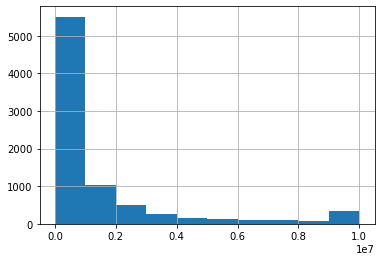

In [22]:
fraud['amount'].hist()